In [1]:
# Just some data visualization

In [3]:
import pandas as pd

In [4]:
from pandas.plotting import register_matplotlib_converters

In [5]:
register_matplotlib_converters()

In [6]:
import matplotlib.dates as mdates

In [7]:
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [9]:
filename = 'data/uah_to_usd_2015.csv'

In [10]:
df = pd.read_csv(filename)

In [11]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [11]:
df.describe()

,buy,sale,nb
count,365.000000,365.000000,365.000000
mean,21.590082,23.507614,21.821706
std,2.418196,2.893886,2.451440
min,16.400000,16.520000,15.749587
25%,20.100000,22.700000,21.153307
50%,21.400000,23.600000,21.932784
75%,23.200000,25.100000,23.081425
max,29.500000,33.500000,30.010175


In [12]:
year_growth_buy_ampl = (df['buy'].max() - df['buy'].min()) / df['buy'].min()

In [13]:
year_growth_buy_ampl * 100  # yearly rate increase % (max amplitude)

79.87804878048782

In [14]:
first_day_buy = df['buy'].iloc[0]
last_day_buy = df['buy'].iloc[-1]
year_growth_buy = (last_day_buy - first_day_buy) / first_day_buy * 100
year_growth_buy

53.658536585365866

In [15]:
year_growth_sale_ampl = (df['sale'].max() - df['buy'].min()) / df['buy'].min()

In [16]:
year_growth_sale_ampl * 100 # yearly sale rate increase % (max amlitude)

104.26829268292686

In [17]:
first_day_sale = df['sale'].iloc[0]
last_day_sale = df['sale'].iloc[-1]
year_growth_sale = (last_day_sale - first_day_sale) / first_day_sale * 100
year_growth_sale

55.47489413188141

In [18]:
def build_chart(df):
    dates = df['date']
    l_days = mdates.DayLocator()
    l_years = mdates.YearLocator()
    l_months = mdates.MonthLocator()
    fig, ax = plt.subplots(figsize=(12, 8))
    plt.plot(dates, df['buy'], 'b', label='Buy')
    plt.plot(dates, df['sale'], 'm', label='Sale')

    ax.legend()
    # Format the ticks ax
    formatter = mdates.DateFormatter('%d/%m')
    ax.xaxis.set_major_locator(l_months)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_minor_locator(l_days)
    
    ax.set_xlim(dates.iloc[0], dates.iloc[-1])
    
    ax.fill_between(dates, df['sale'], df['buy'], color='y')
    
    def rate(x):
        return '%.2f' % x

    ax.format_xdata = mdates.DateFormatter('%d/%m/%y')
    ax.format_ydata = rate
    ax.grid(True)

    fig.autofmt_xdate()


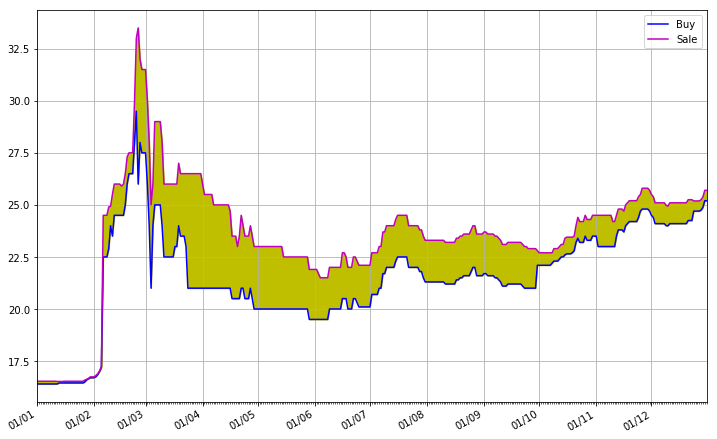

In [19]:
build_chart(df)